In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [66]:
train_df = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv',chunksize=10000)
train_df_example=train_df.__next__()

test_df = pd.read_csv('/kaggle/input/amex-default-prediction/test_data.csv',chunksize=10000)
test_df_example=test_df.__next__()


In [71]:
train_df_example.tail()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
9995,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,0.331150,1.472028,0.049780,0.187973,0.000417,0.143625,0.955153,0.099672,...,NaN,NaN,NaN,0.008082,0.002661,0.003676,NaN,0.001279,0.001011,0.008815
9996,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,0.361060,2.065567,0.048313,0.194930,0.006775,0.144908,1.252287,0.118775,...,NaN,NaN,NaN,0.007419,0.007829,0.000511,NaN,0.008342,0.004060,0.005083
9997,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,0.708199,0.357349,0.013953,1.002573,0.003448,0.110258,0.170252,0.040633,...,NaN,NaN,NaN,0.009987,0.007548,0.003425,NaN,0.005115,0.007862,0.008078
9998,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,0.692401,0.009380,0.018337,0.588057,0.001596,0.108820,0.177197,0.031383,...,NaN,NaN,NaN,0.002379,0.006379,0.009408,NaN,0.005702,0.006532,0.003437
9999,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-05-31,0.779090,0.445052,0.032713,0.171864,0.001149,0.099150,0.009573,0.083275,...,NaN,NaN,NaN,0.001991,0.000735,0.009753,NaN,0.003173,0.007842,0.005381


In [72]:
train_df_example['S_2']

0       2017-03-09
1       2017-04-07
2       2017-05-28
3       2017-06-13
4       2017-07-16
           ...    
9995    2018-02-26
9996    2018-03-19
9997    2017-03-28
9998    2017-04-15
9999    2017-05-31
Name: S_2, Length: 10000, dtype: object

In [73]:
train_df_example['S_2']= pd.to_datetime(train_df_example['S_2'])
test_df_example['S_2']= pd.to_datetime(test_df_example['S_2'])

In [75]:
train_df_example.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

In [76]:
test_df_example.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

In [78]:
columns = train_df_example.columns
columns1= test_df_example.columns

In [79]:
b_columns = list(filter(lambda x: x.startswith("B_"), columns))
r_columns = list(filter(lambda x: x.startswith("R_"), columns))
p_columns = list(filter(lambda x: x.startswith("P_"), columns))
d_columns = list(filter(lambda x: x.startswith("D_"), columns))
s_columns = list(filter(lambda x: x.startswith("S_"), columns))

b_columns1 = list(filter(lambda x: x.startswith("B_"), columns1))
r_columns1 = list(filter(lambda x: x.startswith("R_"), columns1))
p_columns1 = list(filter(lambda x: x.startswith("P_"), columns1))
d_columns1 = list(filter(lambda x: x.startswith("D_"), columns1))
s_columns1 = list(filter(lambda x: x.startswith("S_"), columns1))

In [80]:
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')

In [81]:
train_labels.tail()

,customer_ID,target
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
458912,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0


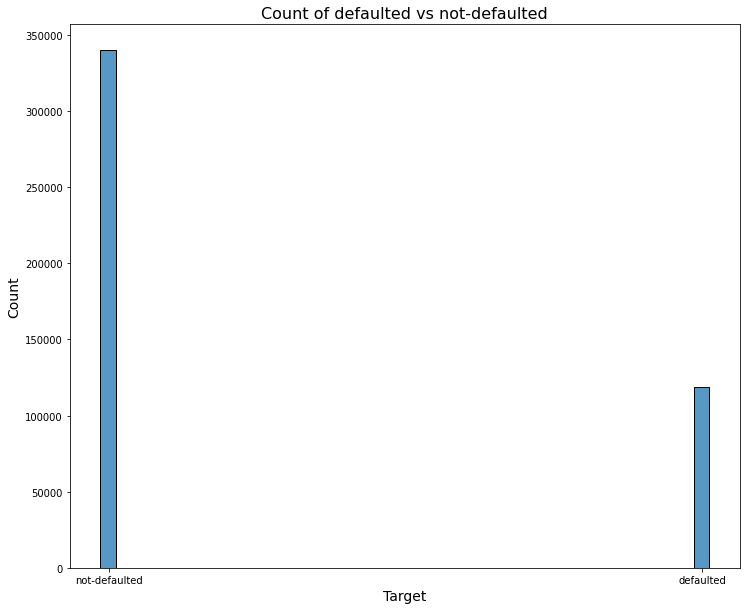

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.histplot(train_labels['target'])
plt.title('Count of defaulted vs not-defaulted',
         fontsize=16)
plt.xticks([0.014, 0.989], ['not-defaulted', 'defaulted'])
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14);


In [83]:
train_labels['customer_ID'].nunique() == len(train_labels)

True

**use PCA to reduce the dimensions of the dataset
replace NA values with 0**

In [85]:
train_df_example.fillna(0, inplace=True)
test_df_example.fillna(0, inplace=True)

In [48]:
train_df_example[train_df_example['customer_ID']=='0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'].head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.0,0.0,0.0,0.002427,0.003706,0.003818,0.0,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.0,0.0,0.0,0.003954,0.003167,0.005032,0.0,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.0,0.0,0.0,0.003269,0.007329,0.000427,0.0,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.0,0.0,0.0,0.006117,0.004516,0.003200,0.0,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.0,0.0,0.0,0.003671,0.004946,0.008889,0.0,0.001670,0.008126,0.009827


In [87]:
mean_values_df = train_df_example.groupby('customer_ID').mean()
mean_values_df_main = test_df_example.groupby('customer_ID').mean()
mean_values_df.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.0,0.000000,...,0.0,0.0,0.0,0.003664,0.005343,0.005178,0.0,0.005066,0.005283,0.005814
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.0,0.077846,...,0.0,0.0,0.0,0.004906,0.006271,0.006007,0.0,0.004824,0.004218,0.004902
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.0,0.000000,...,0.0,0.0,0.0,0.006006,0.004675,0.003607,0.0,0.004288,0.005113,0.004500
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.0,0.061026,...,0.0,0.0,0.0,0.005775,0.005777,0.004181,0.0,0.006742,0.004768,0.005236
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.0,0.048778,...,0.0,0.0,0.0,0.003853,0.004818,0.004818,0.0,0.004852,0.004380,0.004219


In [88]:
X = mean_values_df.reset_index()
X.drop(columns='customer_ID', inplace=True)

X_main = mean_values_df.reset_index()
X_main.drop(columns='customer_ID', inplace=True)

Text(0, 0.5, '% explained variance')

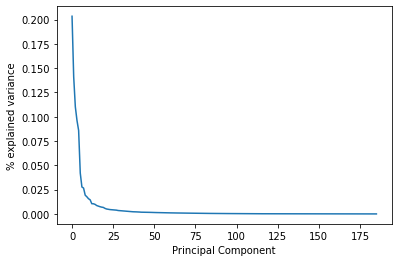

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% explained variance')

Text(0, 0.5, '% explained variance')

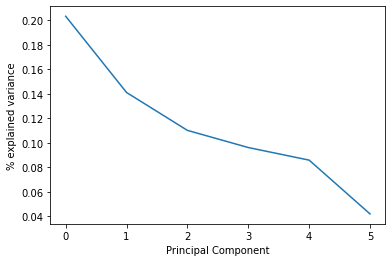

In [52]:
#elbow method
pca_2 = PCA(n_components=6)
pca_2.fit(X)
plt.plot(pca_2.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% explained variance')

**merge customer_ID and target**

In [53]:
X_proj = pd.DataFrame(pca_2.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'])

In [54]:
X_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544614
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164635
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608272
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181592
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228819


In [55]:
mean_values_df.reset_index(inplace=True)
mean_values_df.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.0,...,0.0,0.0,0.0,0.003664,0.005343,0.005178,0.0,0.005066,0.005283,0.005814
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.0,...,0.0,0.0,0.0,0.004906,0.006271,0.006007,0.0,0.004824,0.004218,0.004902
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.0,...,0.0,0.0,0.0,0.006006,0.004675,0.003607,0.0,0.004288,0.005113,0.004500
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.0,...,0.0,0.0,0.0,0.005775,0.005777,0.004181,0.0,0.006742,0.004768,0.005236
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.0,...,0.0,0.0,0.0,0.003853,0.004818,0.004818,0.0,0.004852,0.004380,0.004219


In [56]:
intermediate_merge = X_proj.merge(mean_values_df['customer_ID'], right_index=True, left_index=True)
df = intermediate_merge.merge(train_labels, left_on='customer_ID', right_on='customer_ID')

In [57]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,customer_ID,target
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544614,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164635,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608272,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181592,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228819,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...,...,...,...,...,...,...
821,-1.763246,2.498515,-0.311859,0.187708,-0.514302,0.074041,00774cde32a3a8894c5274e49092252b0d78cc49bffbb8...,1
822,-1.817444,-1.011799,-0.955620,0.229891,0.341197,-0.507769,007756f6fbf1c36b946f3a1723cdcb4a755624c433488a...,0
823,0.153965,3.013065,-0.701994,0.494281,-0.723919,-0.272673,00777a52c3c78548ce384dbc412025582291370ac2790c...,1
824,2.228087,-0.115745,-2.443222,1.167512,0.605500,2.604538,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,1


**visualize relationship between target and new features**

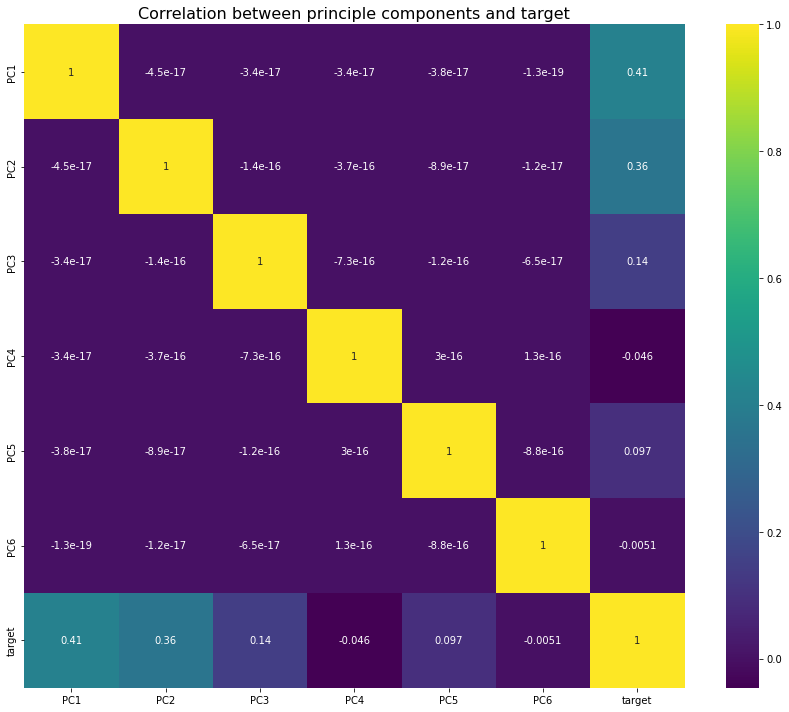

In [58]:
corr = df.drop(columns='customer_ID').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation between principle components and target",
         fontsize=16)
plt.tight_layout()

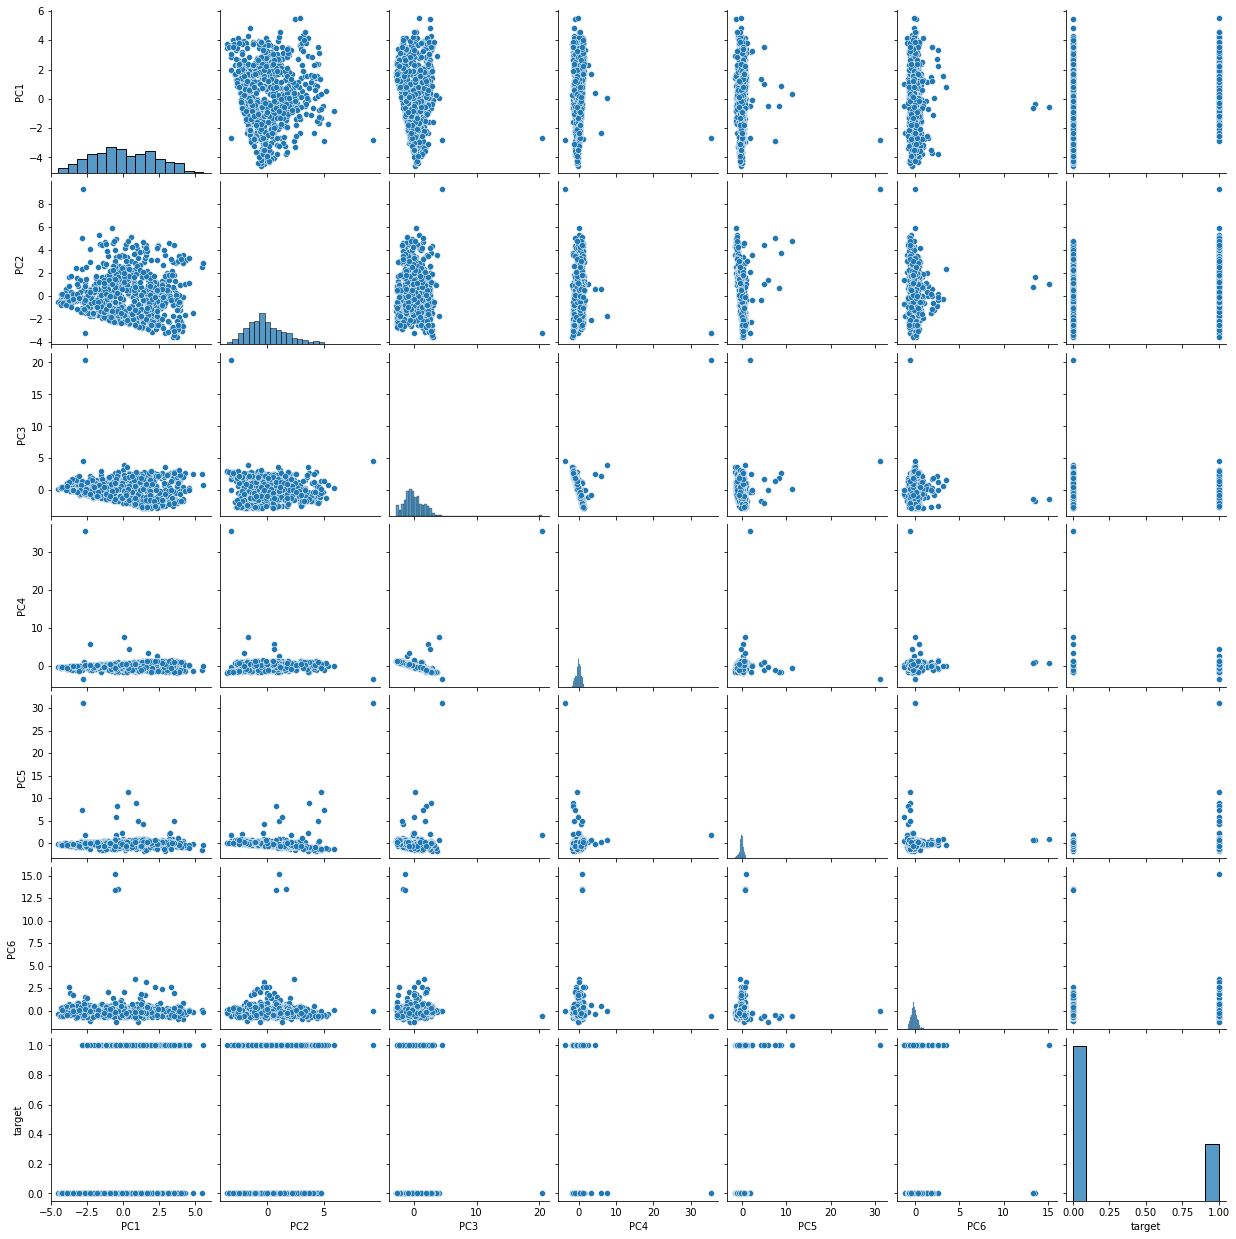

In [59]:
sns.pairplot(data = df.drop(columns='customer_ID'))

**function to collect all training data**

In [61]:
def transform_data(pca):
    chunksize = 70000
    train_df_iter = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', chunksize=chunksize)
    df = pd.DataFrame()
    c = 0
    while c < 79:
        train_df_example = train_df_iter.__next__()
        train_df_example.loc[:, 'S_2'] = pd.to_datetime(train_df_example['S_2'])
        train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')
        train_df_example.fillna(0, inplace=True)
        mean_values_df = train_df_example.groupby('customer_ID').mean()
        X = mean_values_df.reset_index()
        X.drop(columns='customer_ID', inplace=True)
        X_proj = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4',
                                                                 'PC5', 'PC6'])
        mean_values_df.reset_index(inplace=True)
        intermediate_merge = X_proj.merge(mean_values_df['customer_ID'], right_index=True, left_index=True)
        df = df.append(intermediate_merge.merge(train_labels, left_on='customer_ID', right_on='customer_ID'))
        c += 1
    return df


combined_df = transform_data(pca_2)

In [63]:
combined_df.reset_index().drop(columns='index', inplace=True)
combined_df

,PC1,PC2,PC3,PC4,PC5,PC6,customer_ID,target
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544623,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164633,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608278,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181581,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228820,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...,...,...,...,...,...,...
5809,-0.280483,-1.168031,-1.593023,0.581321,0.235099,-0.073838,ffeea21b8f17b728c561de93ea61e75547dd0216b36beb...,0
5810,-1.236900,-1.533446,-0.160914,-0.214983,0.291810,-0.287370,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,0
5811,-0.588542,2.177087,-0.507572,0.295974,-0.458524,-0.188882,ffeec0d708999352e3627f578c7f8a0990b0e1f31e27a5...,1
5812,-0.847331,-0.294046,0.341527,-0.263576,-0.320851,0.282708,ffeec9a34770713d0c488435fbff21db356407c98d9ddb...,0


In [65]:
combined_df.reset_index().drop(columns='index', inplace=True)
combined_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,customer_ID,target
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544623,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164633,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608278,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181581,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228820,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [66]:
combined_df['customer_ID'].value_counts() 

46ed3cd6b58b5f0ebecd05dccd06636b968ff965c7017917d7430f3b064d692b    2
60ff5197b3dced3e6d08335849599bf3a97bb777407f7c3cd29ccb285d37a13a    2
573306392061492e552941119281d7937986de62dd51d11afae339b1b538f886    2
bee507da94080126e042b344bf4375a4722f171f46f8b425633119fc478cc8b8    2
df463cf8fd696d3cc4e854919d7b5841d9d4c01faf9d311aab062aed59ee4100    2
                                                                   ..
551fcc7b0cf6815e292d28992cfbcb081a410852ece15233e56a093e425f4245    1
551fc5ccdc0359a3af78f740f68c73f917f1a24ef5c02c85151bde9b61ddb746    1
551f6eb7b1a98229573ba6503d6991fb982ab6074e3ff988924600a40106c873    1
551f2f43a650dba655776327295ad884594841ed522a7a5b15e4f3b100e1fed1    1
ffef596f2bcf0abb0c5be819c18b40a69baf5c34f87933322c45a774952e62c0    1
Name: customer_ID, Length: 458791, dtype: int64

In [67]:
sum(combined_df['customer_ID'].value_counts() == 2)

70

**merge rows where there is more than one entry per customer**

<AxesSubplot:>

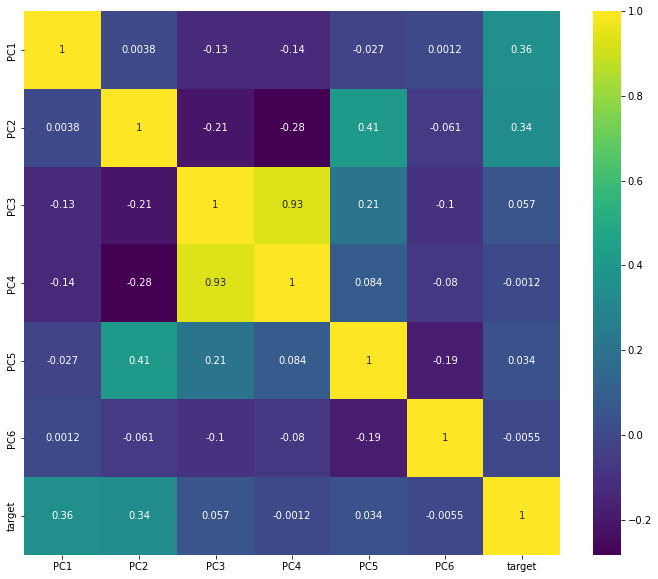

In [68]:
df = combined_df.groupby('customer_ID', as_index=False).mean()
corr = df.drop(columns='customer_ID').corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='viridis')

In [69]:
df.to_csv('transformed_train_data.csv')

In [70]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [71]:
df=pd.read_csv('transformed_train_data.csv')

In [72]:
X = df.drop(columns=['target', 'customer_ID'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

**build dummy model**

In [73]:
display(y[y==0].count())
display(y[y==1].count())

339990

118801

In [77]:
y_dummy = np.array([0] * len(y))

In [78]:
recall_score(y_true=y, y_pred=y_dummy, average=None)

array([1., 0.])

In [82]:
precision_score(y_true=y, y_pred=y_dummy, average=None)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.74105639, 0.        ])

In [83]:
accuracy = accuracy_score(y_true=y, y_pred=y_dummy)
accuracy

0.7410563851514088

**Logistic Regression**

In [85]:
log_reg = LogisticRegression()
score_log = cross_validate(log_reg, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])
score_log

{'fit_time': array([0.15833879, 0.16925788, 0.17277312, 0.16261315, 0.16685247]),
 'score_time': array([0.02765703, 0.02792573, 0.02740335, 0.02747512, 0.02769279]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.74037344, 0.74037344, 0.74036401, 0.74040033, 0.74040033])}

In [86]:
display(f"The mean recall of the Logistic Regression is: {score_log['test_recall'].mean()}")
display(f"The mean accuracy of the Logistic Regression model is: {score_log['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the Logistic Regression is: 0.0'

'The mean accuracy of the Logistic Regression model is: 0.740382310118241'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**KNeighboursClassifier**

In [87]:
k_classifier = KNeighborsClassifier()
score_k = cross_validate(k_classifier, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])

In [88]:
display(f"The mean recall of the KNeighbours Classifier is: {score_k['test_recall'].mean()}")
display(f"The mean accuracy of the KNeighbours Classifier is: {score_k['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the KNeighbours Classifier is: 0.11417993908341446'

'The mean accuracy of the KNeighbours Classifier is: 0.6924736722784564'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**Decision Tree Classifier**

In [89]:
t_classifier = DecisionTreeClassifier(random_state=42)
score_c = cross_validate(t_classifier, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])

display(f"The mean recall of the Decision Tree Classifier is: {score_c['test_recall'].mean()}")
display(f"The mean accuracy of the Decision Tree Classifier is: {score_c['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the Decision Tree Classifier is: 0.5912741469169823'

'The mean accuracy of the Decision Tree Classifier is: 0.7878986024627196'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**Random Forest Classifier**

In [90]:
random_classifier = RandomForestClassifier(random_state=42)
score_rc = cross_validate(random_classifier, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])

display(f"The mean recall of the Random Forest Classifier is: {score_rc['test_recall'].mean()}")
display(f"The mean accuracy of the Random Forest Classifier is: {score_rc['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the Random Forest Classifier is: 0.6592224905860227'

'The mean accuracy of the Random Forest Classifier is: 0.8382774962632921'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**Ada Boost Classifier**

In [91]:
ada = AdaBoostClassifier(random_state=42)
score_a = cross_validate(ada, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])

display(f"The mean recall of the Ada Boost Classifier is: {score_a['test_recall'].mean()}")
display(f"The mean accuracy of the Ada Boost Classifier is: {score_a['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the Ada Boost Classifier is: 0.5613015601245148'

'The mean accuracy of the Ada Boost Classifier is: 0.8206150819221036'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**Gradient Boosting Classifier**

In [92]:
gradient = GradientBoostingClassifier(random_state=42)
score_g = cross_validate(gradient, X_train, y_train, cv=5, scoring=['recall', 'accuracy'])

display(f"The mean recall of the Gradient Boosting Classifier is: {score_g['test_recall'].mean()}")
display(f"The mean accuracy of the Gradient Boosting Classifier is: {score_g['test_accuracy'].mean()}")
display(f"The mean accuracy of the dummy model is: {accuracy}")

'The mean recall of the Gradient Boosting Classifier is: 0.6422913389215503'

'The mean accuracy of the Gradient Boosting Classifier is: 0.8312953604073936'

'The mean accuracy of the dummy model is: 0.7410563851514088'

**test Random Forest Classifier on test data**

In [96]:
random_classifier.fit(X_train, y_train)

y_pred = random_classifier.predict(X_test)

In [97]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89    238086
         1.0       0.70      0.66      0.68     83068

    accuracy                           0.84    321154
   macro avg       0.79      0.78      0.79    321154
weighted avg       0.84      0.84      0.84    321154

